In [6]:
import sqlite3

# Connect to the database (or create it)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")

# Create table
cursor.execute('''       
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sales data
sales_data = [
    ('Chais',18,45),
('Chang',19,20),
('Aniseed Syrup',10,30),
('Chef Antons Cajun Seasoning',22,20),
('Chef Antons Gumbo Mix',21.35,65),
('Grandmas Boysenberry Spread',25,30),
('Uncle Bobs Organic Dried Pears',30,15),
('Ikura',31,24),
('Queso Cabrales',21,12),
('Queso Manchego La Pastora',38,12),
('Konbu',6,10),
('Tofu',23.25,9),
('Genen Shouyu',15.5,20),
('Pavlova',17.45,35),
('Alice Mutton',39,30)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)


conn.commit()
conn.close()

print("Database created and sample data inserted.")


Database created and sample data inserted.


In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# SQL query 
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
order by 3 desc
limit 8

'''
df = pd.read_sql_query(query, conn)
print(df)   ##queay Out put

                          product  total_qty  revenue
0           Chef Antons Gumbo Mix      21.35  1387.75
1                    Alice Mutton      39.00  1170.00
2                           Chais      18.00   810.00
3     Grandmas Boysenberry Spread      25.00   750.00
4                           Ikura      31.00   744.00
5                         Pavlova      17.45   610.75
6       Queso Manchego La Pastora      38.00   456.00
7  Uncle Bobs Organic Dried Pears      30.00   450.00


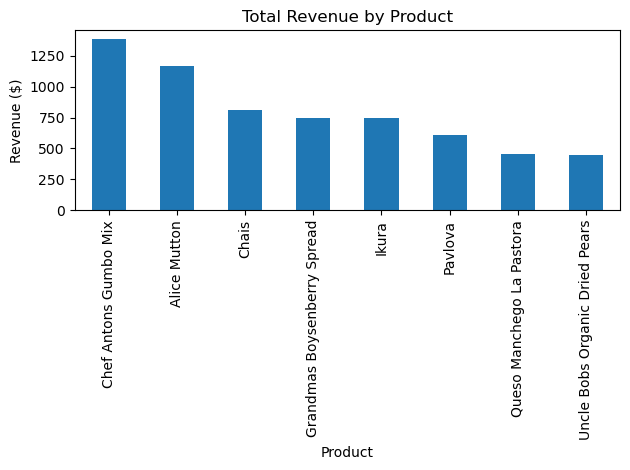

In [14]:

# Plot bar chart 
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()


plt.show()


conn.close()

In [13]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>